Для реализованной модели построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.


In [1]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import matplotlib
from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [61]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [62]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [63]:
def get_error_plot(n_trees, train_err, test_err):

    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [64]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1207.275535899162
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4537.466050398318


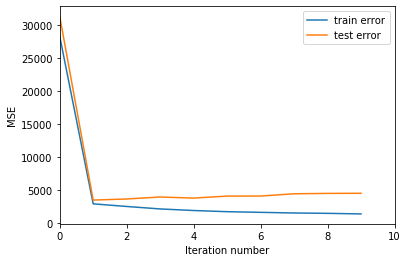

In [65]:
get_error_plot(n_trees, train_errors, test_errors)

In [20]:
%%time
n_trees = 50
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

CPU times: user 43.7 s, sys: 320 ms, total: 44 s
Wall time: 44.2 s


In [21]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 56.3019065071977
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6155.727160579448


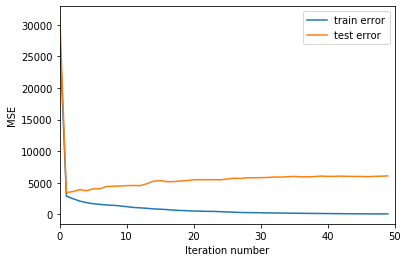

In [22]:
get_error_plot(n_trees, train_errors, test_errors)

In [110]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [111]:
max_depth = 3
trees2, train_errors2, test_errors2 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
max_depth = 5
trees3, train_errors3, test_errors3 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [121]:
max_depth = 10
trees4, train_errors4, test_errors4 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

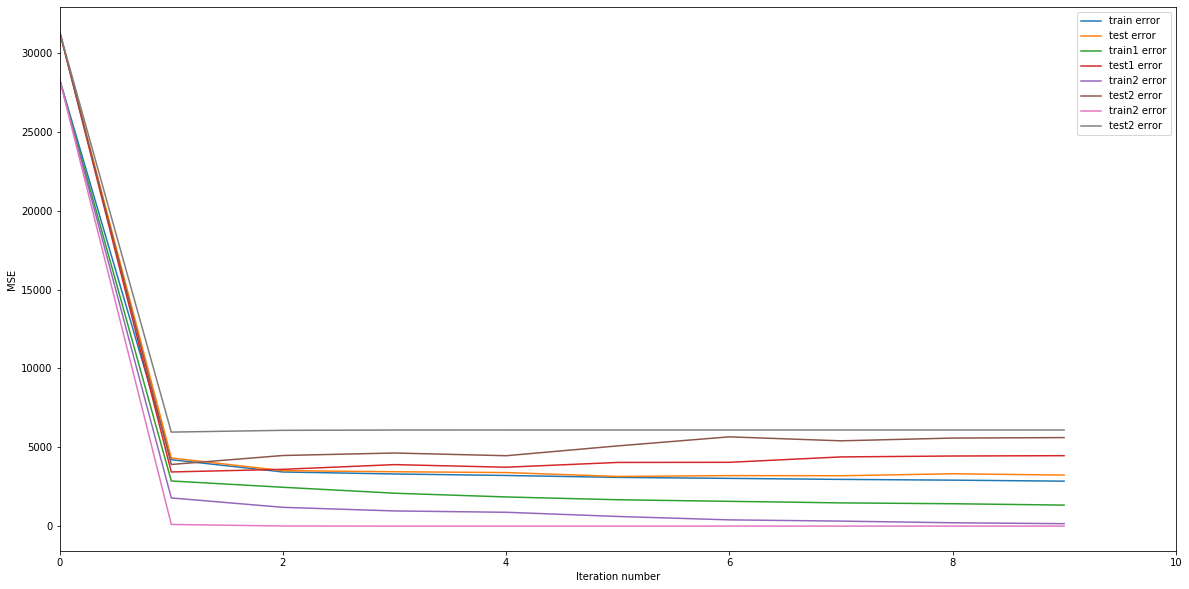

In [122]:
plt.figure(figsize=(20,10))
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), train_errors, label='train error')
plt.plot(list(range(n_trees)), test_errors, label='test error')
plt.plot(list(range(n_trees)), train_errors2, label='train1 error')
plt.plot(list(range(n_trees)), test_errors2, label='test1 error')
plt.plot(list(range(n_trees)), train_errors3, label='train2 error')
plt.plot(list(range(n_trees)), test_errors3, label='test2 error')
plt.plot(list(range(n_trees)), train_errors4, label='train2 error')
plt.plot(list(range(n_trees)), test_errors4, label='test2 error')
plt.legend(loc='upper right')
plt.show()

Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [101]:
import numpy as np  
import random 


def get_bootstrap(data, labels, N):
    n_samples = int(data.shape[0]*N)
    perm = np.random.permutation(len(data))
 
    b_data = np.zeros((n_samples,data.shape[1]))
    b_labels = np.zeros((n_samples))
    for j in range(n_samples):
        sample_index = random.randint(0, data.shape[0]-1)
    
        b_data[j] = data[sample_index]
        b_labels[j] = labels[sample_index]
        
    return b_data,b_labels
        
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        X_train_1,y_train1 = get_bootstrap(X_train,y_train,0.5)
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        if len(trees) == 0:
            tree.fit(X_train_1, y_train1)
            train_errors.append(mean_squared_error(y_train1, gb_predict(X_train_1, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train_1, trees, coefs, eta)
            tree.fit(X_train_1, bias(y_train1, target))
            train_errors.append(mean_squared_error(y_train1, gb_predict(X_train_1, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        trees.append(tree)

    return trees, train_errors, test_errors

In [108]:
%%time
n_trees = 100
coefs = [1] * n_trees
max_depth = 1


trees, train_errors, test_errors = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
#

Ошибка алгоритма из 100 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 2893.209049361198
Ошибка алгоритма из 100 деревьев глубиной 1     с шагом 1 на тестовой выборке: 6316.17448150298
CPU times: user 1min 44s, sys: 779 ms, total: 1min 45s
Wall time: 1min 46s


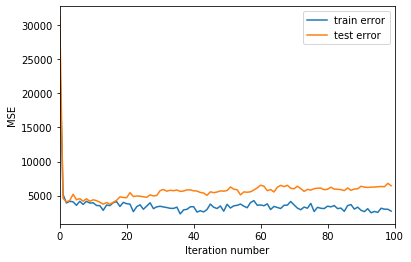

In [109]:
get_error_plot(n_trees, train_errors, test_errors)